# Árvores de Decisão e Random Forest

Bem vindo ao notebook sobre Árvores de Decisão e Random Forest! Neste notebook vou tentar explicar superficialmente um pouco de tudo:

- O que é uma árvore de decisão
- O que é entropia ou impureza
- O que é o Random Forest
- E, por fim, vamos colocar um pouco desses conhecimentos em prática em um dataset de exemplo

*Já me adianto dizendo que é praticamente impossível explicar todos esses assuntos no detalhe, com um grande nível de profundidade, em um notebook conciso. Portanto, anexarei alguns links no final do notebook para que você fique à vontade para se aprofundar em qualquer um dos tópicos, e, no notebook, me limitarei a explicar os assuntos superficialmente, para que você tenha apenas uma ideia do que são os termos aos quais estou me referindo*

**Obs.:** Existem árvores de classificação (que são às quais eu estarei me referindo neste notebook) e árvores de regressão, que são utilizadas para fornecer *outputs* numéricos em vez de classificações. Para todos os efeitos, neste notebook estarei me referindo apenas à árvores de classificação.

## Árvore de Decisão

Mesmo que você não tenha tido muito contato com nada de estatística, machine learning, econometria nem nada disso, eu aposto que você já deve ter visto uma árvore de decisão antes em algum momento. Uma árvore de decisão é algo que se parece com isso aí:

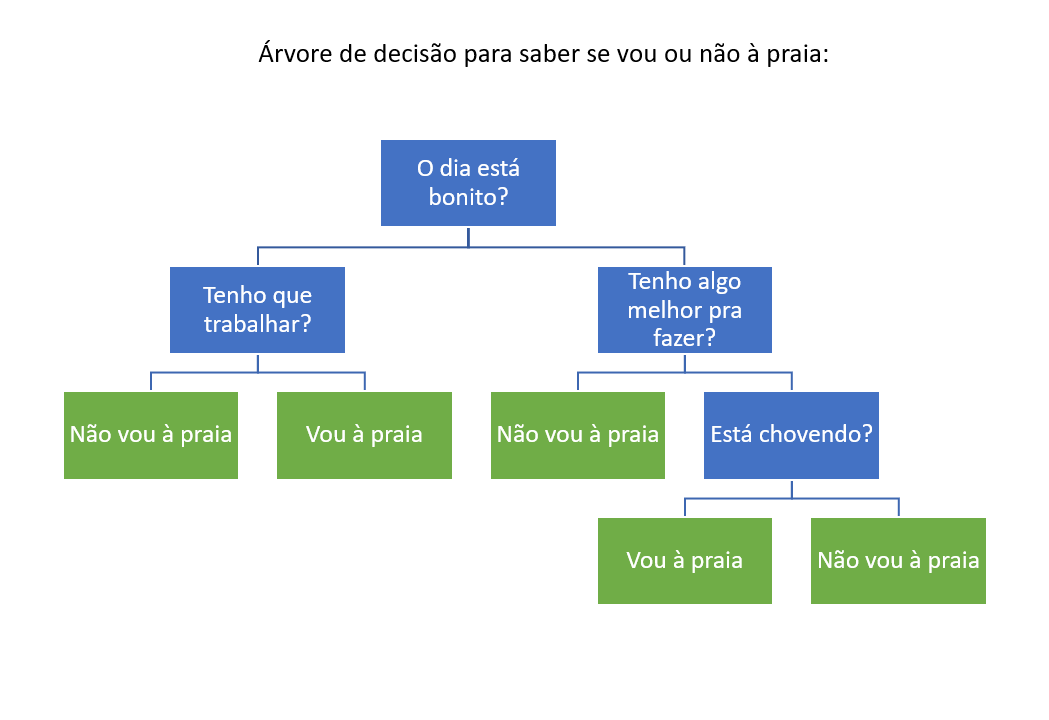

Viu como parece ser simples? Uma árvore de decisão é basicamente um conjunto de ramificações, que eventualmente vão nos levar a algum tipo de decisão.

Vamos falar de algumas terminologias e convenções:
- A partir de alguma pergunta, quando vamos para o lado **esquerdo** significa que a resposta para essa pergunta é **sim**, ou, `True`, quando vamos para o lado direito, signfica `False`
- O primeiro "bloco" da árvore, que pergunta se o dia está bonito, é chamado de *root node*, ou, raiz
- Os blocos seguintes são chamados de *nodes*
- Os blocos em verde, que são as resposta, são chamados de *leaves* ou, folhas

## Entropia ou Impureza?

Beleza, entender uma árvore de decisão é algo relativamente simples, mas, quando você para pra pensar como deve montar uma árvore de decisão, isso pode não parecer tão simples assim... Como saber quais perguntas fazer em que ordem? Montar uma árvore de decisão ideal pode ser algo bem difícil, mas, ainda bem que existem alguns métodos pra fazer isso!

Esses métodos, não se limitam à, mas incluem medidas de **Entropia** e de **Impureza de Gini**.

Tentando me limitar à poucas palavras, a entropia e a impureza de Gini são medidas para quantificar similaridades ou diferenças dentro de um conjunto de dados, ou, em outras palavras, vão basicamente nos retornar um número para falar o quanto uma distribuição é uniforme ou não.

Vou tentar resumir isso em um exemplo extremamente simples:

Vamos supor que você tem duas caixas de sorvete, e uma delas contém 5 sorvetes de uva e 5 sorvetes de chocolate, enquanto a outra caixa possui apenas 10 sorvetes de uva. A primeira caixa, que tem 5 sorvetes de cada, vai ser considerada altamente impura, quando medida pela impureza de Gini, e vai ter alta entropia, porque não se trata de uma distribuição uniforme (entenda isso como o seguinte: não conseguiremos ter um alto nível de certeza sobre qual sorvete iremos pegar se simplesmente fecharmos o olho e pegarmos qualquer um). Agora, a segunda caixa de sorvete, será perfeitamente pura e possuirá uma entropia igual à 0! Porque se trata de uma distribuição perfeitamente uniforme, temos 100% de certeza de certeza sobre qual sorvete pegaremos se simplesmente fecharmos o olho e pegarmos qualquer um!

E o que que isso tem a ver com uma árvore de decisão? Bom, pense que cada pergunta da árvore irá criar um universo com distribuição "sim e não" sobre a minha decisão de ir pra praia, e, após cada pergunta, esse universo criado terá uma entropia e uma impureza, para escolhermos a pergunta que queremos fazer primeiro, basta selecionar a pergunta que criar o universo com menor entropia, ou menor impureza de Gini!

*Ressalvando novamente que estou me limitando a explicar a entropia e a impureza de Gini conceitualmente, é possível que eu faça um notebook no futuro explicando a matemática por trás desses conceitos, mas por ora, para isso, apenas colocarei alguns materiais interessantes ao final do notebook*

## Random Forest

Bom, tendo entendido basicamente o que é uma árvore de decisão, podemos falar o que é *Random Forest*.

*Random Forest* é um algoritmo de machine learning que deriva das árvores de decisão. A tradução de *Random Forest* é **Floresta Aleatória** e tem esse nome por causa de seu funcionamento.

Uma árvore de decisão por si só pode não resultar em um modelo de predição robusto, sendo que ela pode sofrer seriamente de um problema de *overfitting*, que ocorre quando um modelo fica "acostumado" com o dataset de treinamento, performa muito bem com ele, mas começa a performar pior quando vamos para um ambiente de teste, ou quando vamos para o mundo real.

O *Random Forest* é um algoritmo que aparece para tentar atacar esses problemas que eventualmente podem surgir quando usamos apenas uma árvore de decisão. Sendo que se trata de um algoritmo que vai usar diversas árvores (estamos falando de altas quantidades), geradas por meio de *bootstrap* do seu dataset de treino, e ocultando algumas variáveis explicativas, para ir gerando árvores diferentes entre si, que podem gerar, eventualmente, resultados diferentes, e, no final, faz uma votação entre as diferentes árvores.

Ok, vamos com um pouco de calma, vou explicar novamente: O Random Forest faz aquele processo de entropia para criar a árvore diversas vezes com o mesmo dataset de partida. Mas aí você poderia imaginar: mas isso não vai resultar sempre na mesma árvore?

E a resposta é: Não! E isso acontece porque o algoritmo faz algo chamado *bootstraping* que é basicamente replicar o seu dataset de partida, com variações, de forma artificial, imagine que o algortimo vai pegar amostras da sua amostra e criar uma outra amostra artificial (podendo inclusive pegar valores repetidos)! Então é como se cada árvore fosse criado de um ponto de partida diferente.

E, além disso, o algoritmo também remove colunas do seu dataset, ou seja, as árvores vão possuir variáveis explicativas diferentes!

Sendo assim, vão sendo criadas árvores diferentes para um mesmo dataset de treino. E então, quando chega no momento de prever algum valor, ocorre uma votação entre as árvores, e o valor mais comum é igual ao valor predito!

*Bom, espero que as minhas explicações, por mais que tenham sido bem concisas, tenham sido claras, pois agora, vamos tentar colocar a mão na massa*

# Colocando Árvore de Decisão e Random Forest na prática:

## Análise exploratória dos dados

In [1]:
# Importando as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.set_style("darkgrid")

Vou importar o dataset do nosso projeto. Se tratam de dados disponíveis no [LendingClub.com](https://www.lendingclub.com/). E contém o seguinte:

In [3]:
df_emprestimos = pd.read_csv('loan_data.csv')
df_emprestimos.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
df_emprestimos.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Esta tabela contém informações de empréstimos, e o que queremos prever é se o empréstimo foi pago totalmente, ou seja, queremos prever a última coluna *not.fully.paid*.

Já podemos extrair algumas informações interessantes desse `describe`, que não temos nenhum valor em branco (isso pode ser visto já que o `count` é igual para todas as colunas.

Podemos ver também, no comando `head`, que temos a coluna *purpose* com informações categóricas em formato de texto, então teremos que fazer, ou uma transformação em *dummy* ou então algum outro tipo de transformação categórica.

Podemos também ver que os valores entre as colunas possuem magnitudes bem diferentes, então, pode ser conveniente fazer algum tipo de normalização (Como estamos testando um modelo de Árvore de Decisão, a normalização, em tese, não deve interferir muito no nosso resultado, porém, se estivéssemos utilizando algum algoritmo que se baseia em distância cartesiana, ou até mesmo otimização por gradiente, a normalização seria extremamente bem vinda).

E, por fim, uma outra coisa que podemos perceber é que, ao ver o `describe`, temos uma média de ~0.16, que se aproxima muito mais de 0 do que de 1, significando que temos muito mais 1s na nossa base do que 0, o que pode não ser ideal, então, devemos ter em mente que realizar um balanceamento da base pode ser bem vindo.

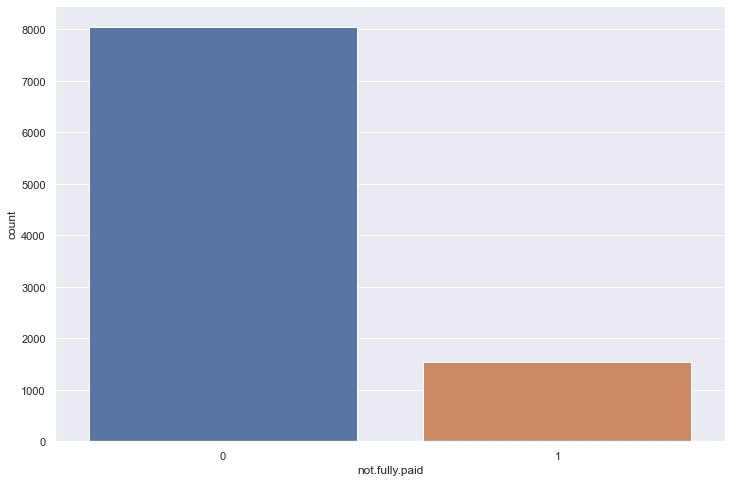

In [38]:
# Confirmando que a nossa base realmente não está idealmente balanceada

sns.countplot(x='not.fully.paid', data=df_emprestimos)

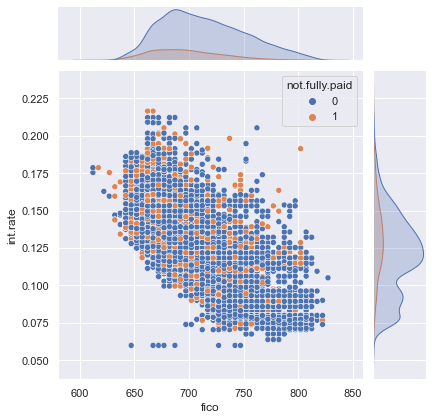

In [5]:
# Fazendo algumas análises exploratórias dos nossos dados

sns.jointplot(x='fico', # É o score de crédito de quem pega emprestado
              y='int.rate', # É a taxa de juros
              data=df_emprestimos, 
              hue='not.fully.paid', # Separamos a cor entre quem pagou e não pagou
             )

<Figure size 792x504 with 0 Axes>

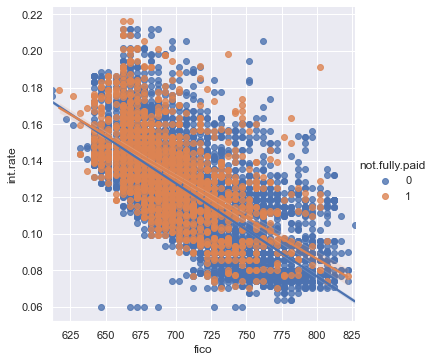

In [6]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',
           x='fico',
           data=df_emprestimos,
           hue='not.fully.paid'
          )

## Montando o dataset para o modelo

In [7]:
df_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Primeiro passo é transformar os dados categóricos em *dummy*

In [8]:
df_tratado = pd.get_dummies(df_emprestimos, columns=['purpose'], drop_first=True)
df_tratado.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [9]:
list(df_emprestimos['purpose'].unique())

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

Veja que o nosso dataframe tratado não possui mais a coluna *purpose*, sendo que os valores foram transformados em outras colunas com outputs binários, e uma delas ficou de fora para não causar um problema de **multicolinearidade**.

Para efeitos de não me aprofundar em outros assuntos, vou me poupar dos preciosismos de normalizar a balancear a minha base de dados nesse projeto, mas tenha em mente que para efeitos de um projeto na vida real, talvez sejam tarefas que possam melhorar a performance de alguns modelos!

### Train-Test-Split

In [10]:
from sklearn.model_selection import train_test_split

X = df_tratado.drop('not.fully.paid',axis=1) # Variáveis explicativas
y = df_tratado['not.fully.paid'] # O que estamos querendo prever

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

### Treinando uma árvore de decisão:

In [17]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier() # Instanciando o objeto de uma árvore de classificação
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

Acima eu simplesmente treinei uma árvore de decisão com os parâmetros padrão do Scikit Learn, mas, recomendo que você veja os *docstrings* tanto do objeto `DecisionTreeClassifier` quanto do `fit`, pois existem diversos parâmetros que podem influenciar no seu modelo na vida real, e inclusive tentar evitar o problema do *overfitting*.

#### Avaliando a árvore de decisão:

In [18]:
previsao_teste = arvore.predict(X_test)
previsao_treino = arvore.predict(X_train)

print('Como o modelo se portou no treino: \n')
print(classification_report(y_train, previsao_treino))
print(confusion_matrix(y_train, previsao_treino))
print('\n')
print('Como o modelo se portou no teste: \n')
print(classification_report(y_test, previsao_teste))
print(confusion_matrix(y_test, previsao_teste))

Como o modelo se portou no treino: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5653
           1       1.00      1.00      1.00      1051

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704

[[5653    0]
 [   0 1051]]


Como o modelo se portou no teste: 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2392
           1       0.21      0.21      0.21       482

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874

[[2011  381]
 [ 379  103]]


Veja um exemplo de possível caso de *overfitting*, onde nosso modelo está acertando 100% da nossa base de treino. Isso provavelmente acontece porque, como não setamos nenhum parâmetro para nossa árvore de decisão, ela simplesmente vai crescendo até conseguir acertar tudo no ambiente de treino. Porém, quando chega no teste, os mesmos parâmetros podem não servir, então o modelo não consegue replicar o mesmo comportamento.

Vou tentar atacar esse problema com uma solução de exemplo, que pode não ser a ideal para o seu ambiente, mas serve para elucidar como podemos evitar que a árvore cresça sem parar até acertar 100% da nossa base de treino. Basta eu colocar um limite para o crescimento da "profundidade" da minha árvore:

In [13]:
arvore = DecisionTreeClassifier(max_depth=3) # <- VEJA O PARÂMETRO MAX DEPTH
arvore.fit(X_train, y_train)

previsao_teste = arvore.predict(X_test)
previsao_treino = arvore.predict(X_train)

print('Como o modelo se portou no treino: \n')
print(classification_report(y_train, previsao_treino))
print(confusion_matrix(y_train, previsao_treino))
print('\n')
print('Como o modelo se portou no teste: \n')
print(classification_report(y_test, previsao_teste))
print(confusion_matrix(y_test, previsao_teste))

Como o modelo se portou no treino: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5653
           1       0.65      0.02      0.04      1051

    accuracy                           0.84      6704
   macro avg       0.75      0.51      0.48      6704
weighted avg       0.81      0.84      0.78      6704

[[5642   11]
 [1031   20]]


Como o modelo se portou no teste: 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2392
           1       0.29      0.01      0.02       482

    accuracy                           0.83      2874
   macro avg       0.56      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

[[2382   10]
 [ 478    4]]


Veja que o modelo parou de acertar 100% do teste, e temos performances mais "parecidas" no teste e no treino. Além de termos aumentado a nossa acurácia de teste para 83%.

### Treinando um random forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=12) # O parâmetro setta o número de árvores da floresta
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=200)

#### Avaliando o Random Forest:

In [34]:
previsao_teste = rfc.predict(X_test)
previsao_treino = rfc.predict(X_train)

print('Como o modelo se portou no treino: \n')
print(classification_report(y_train, previsao_treino))
print(confusion_matrix(y_train, previsao_treino))

print('\n')
print('Como o modelo se portou no teste: \n')
print(classification_report(y_test, previsao_teste))
print(confusion_matrix(y_test, previsao_teste))

Como o modelo se portou no treino: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5653
           1       1.00      0.30      0.46      1051

    accuracy                           0.89      6704
   macro avg       0.94      0.65      0.70      6704
weighted avg       0.90      0.89      0.86      6704

[[5653    0]
 [ 735  316]]


Como o modelo se portou no teste: 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2392
           1       0.46      0.01      0.02       482

    accuracy                           0.83      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.77      0.83      0.76      2874

[[2385    7]
 [ 476    6]]


## Avaliação dos modelos

Em uma avaliação superficial, podemos ver que os modelos que tiveram melhor acurácia foram o RF e a Árvore de Decisão "ajustada". Porém, em todos os modelos, e principalmente nestes de maior acurácia temos um *recall* bem baixo para os valores *1*. Para decidir, dentre os modelos, qual seria o melhor, esses fatores deveriam ser levados em conta, analisando qual métrica vale mais a pena de ser comprometida. <br><br>

Porém, como eu disse anteriormente, em um caso real, e de maior preciosismo, valeria a pena fazer ajustes maiores em nossa base de treinamento e maiores *tunings* no modelo, até chegar em um ponto ideal. <br><br>

Eventualmente, se nem isso resultar em um modelo satisfatório, também vale a pena a tentativa de outros algoritmos e a busca (ou confecção) de outras variáveis explicativas. <br><br>

*Pode ser que eventualmente no futuro eu tente fazer um outro notebook tentando melhorar este modelo, com ajustes na base e tentando rodar outros algoritmos*

# Conclusão

Bom, neste notebook conseguimos ter uma breve noção dos conceitos por trás de uma árvore de decisão e como aplicar este modelo em um dataset de exemplo. Espero que tenha conseguido aprender um pouco. E sinta-se livre para entrar em contato comigo no Reddit em caso de dúvidas ou sugestões.

Criado por: <br><br>

Reddit: **u/_jvsm**

# Apêndice (em inglês):

[Impureza vs Gini](https://quantdare.com/decision-trees-gini-vs-entropy/)

[Excelente vídeo no YouTube sobre árvores de decisão](https://www.youtube.com/watch?v=_L39rN6gz7Y)

[Excelente vídeo no YouTube sobre entropia](https://www.youtube.com/watch?v=YtebGVx-Fxw)